In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/diabetes1.csv')
df.head()

,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,148,72,35.0,0.0,33.6,0.627,50,1
1,85,66,29.0,0.0,26.6,0.351,31,0
2,183,64,0.0,0.0,23.3,0.672,32,1
3,89,66,23.0,94.0,28.1,0.167,21,0
4,137,40,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.tail()

,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
1090,133,102,28.0,140.0,32.8,0.234,45,1
1091,173,82,48.0,465.0,38.4,2.137,25,1
1092,118,64,23.0,89.0,0.0,1.731,21,0
1093,84,64,22.0,66.0,35.8,0.545,21,0
1094,105,58,40.0,94.0,34.9,0.225,25,0


In [ ]:
df['glucose'].fillna(df['glucose'].median(), inplace = True)
df['insulin'].fillna(df['insulin'].median(), inplace = True)
df['triceps'].fillna(df['triceps'].median(), inplace = True)

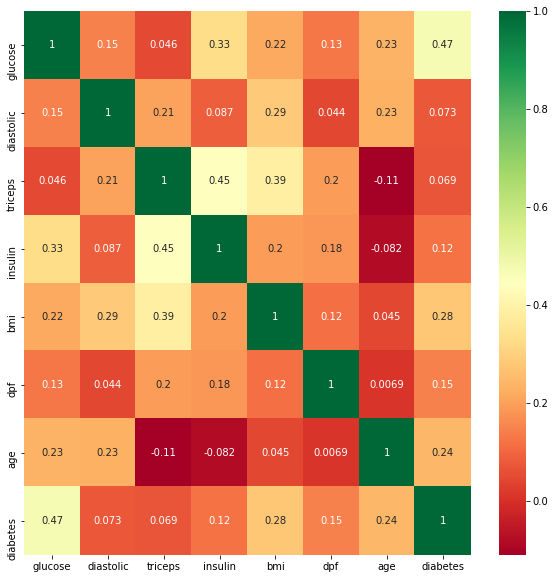

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

In [ ]:
df.corr()

,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
glucose,1.000000,0.147855,0.046341,0.328084,0.216236,0.132234,0.234674,0.472506
diastolic,0.147855,1.000000,0.205010,0.086940,0.286972,0.044169,0.229204,0.072758
triceps,0.046341,0.205010,1.000000,0.445494,0.385781,0.195133,-0.110595,0.069073
insulin,0.328084,0.086940,0.445494,1.000000,0.197047,0.181838,-0.082269,0.121754
bmi,0.216236,0.286972,0.385781,0.197047,1.000000,0.115027,0.044977,0.278128
dpf,0.132234,0.044169,0.195133,0.181838,0.115027,1.000000,0.006898,0.146874
age,0.234674,0.229204,-0.110595,-0.082269,0.044977,0.006898,1.000000,0.241393
diabetes,0.472506,0.072758,0.069073,0.121754,0.278128,0.146874,0.241393,1.000000


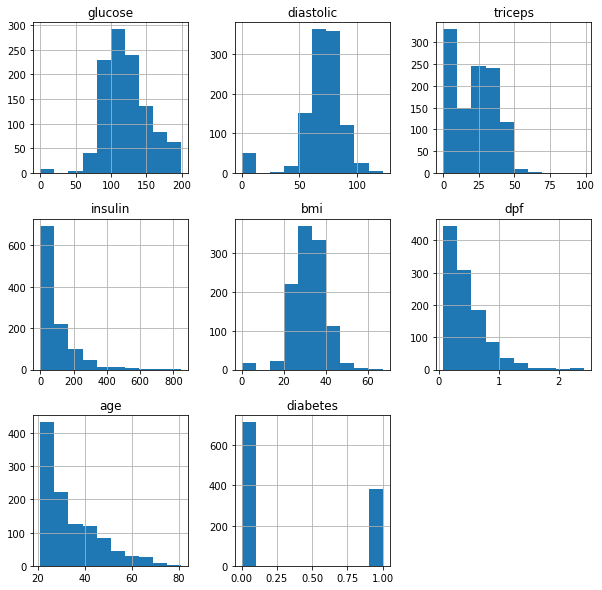

In [ ]:
p = df.hist(figsize = (10,10))

In [ ]:
X = df.drop(columns = ['diabetes'])
y = df['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.7737226277372263

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
rf.score(X_test,y_test)

0.8467153284671532

In [ ]:
cross_val_rf= cross_val_score(rf,X_train,y_train,cv = 10,scoring = "f1_macro")
cross_val_rf

array([0.85045045, 0.87689741, 0.89329863, 0.82792575, 0.87899656,
       0.86441799, 0.84667687, 0.77472527, 0.88956229, 0.81018519])

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.score(X_test,y_test)

0.7481751824817519

In [ ]:
cross_val_log = cross_val_score(log_reg,X_train,y_train,cv=10,scoring="f1_macro")
cross_val_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.79211888, 0.83104396, 0.66530612, 0.71276063, 0.75261757,
       0.66208791, 0.80288462, 0.66764923, 0.73491379, 0.75151515])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
cross_val_dt = cross_val_score(dt,X_train,y_train,cv = 10,scoring = "f1_macro")
cross_val_dt

array([0.81983637, 0.82218515, 0.86858974, 0.83994795, 0.77143794,
       0.82521725, 0.78974359, 0.80673401, 0.78974359, 0.85439871])

In [ ]:
y_pred_dt = dt.predict(X_test)
dt.score(X_test,y_test)

0.8211678832116789

In [ ]:
print("Random Forest       ")
print(cross_val_rf)

print("Decision Tree       ")
print(cross_val_dt)

print("Logistic Regression ")
print(cross_val_log)


Random Forest       
[0.85045045 0.87689741 0.89329863 0.82792575 0.87899656 0.86441799
 0.84667687 0.77472527 0.88956229 0.81018519]
Decision Tree       
[0.81983637 0.82218515 0.86858974 0.83994795 0.77143794 0.82521725
 0.78974359 0.80673401 0.78974359 0.85439871]
Logistic Regression 
[0.79211888 0.83104396 0.66530612 0.71276063 0.75261757 0.66208791
 0.80288462 0.66764923 0.73491379 0.75151515]


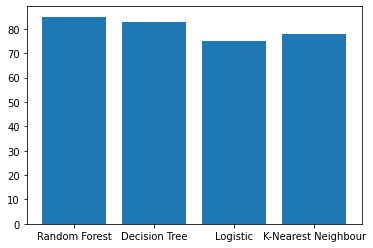

In [ ]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
algo=['Random Forest','Decision Tree','Logistic','K-Nearest Neighbour']
accur = [math.ceil(rf.score(X_test,y_test)*100),math.ceil(dt.score(X_test,y_test)*100),math.ceil(log_reg.score(X_test,y_test)*100),math.ceil(knn.score(X_test,y_test)*100)]
plt.bar(algo,accur)
plt.show()

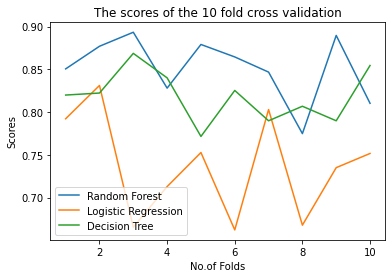

In [ ]:
x1 = [1,2,3,4,5,6,7,8,9,10,]
y1 = cross_val_rf
# plotting the line 1 points 
plt.plot(x1, y1, label = "Random Forest")
# line 2 points
x2 = [1,2,3,4,5,6,7,8,9,10]
y2 = cross_val_log
# plotting the line 2 points 
plt.plot(x2, y2, label = "Logistic Regression")
x3 = [1,2,3,4,5,6,7,8,9,10,]
#y3= cross_val_knn
# plotting the line 1 points 
#plt.plot(x3, y3, label = "K-nearest Neighbor")
x4=[1,2,3,4,5,6,7,8,9,10]
y4=cross_val_dt
plt.plot(x4,y4,label="Decision Tree")
plt.xlabel('No.of Folds')
# Set the y axis label of the current axis.
plt.ylabel('Scores')
# Set a title of the current axes.
plt.title('The scores of the 10 fold cross validation')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, rf.predict(X_test))*100)

84.67153284671532


In [ ]:
import pickle
pickle.dump(rf, open("diabetes.pkl",'wb'))